# THE SPARKS FOUNDATION GRIP TASKS

# Data Science And Business Analytics Internship- Sep22
## **Author : ASHISH SINGH**
## **TASK1 : Prediction Using Supervised Machine Learning**
 **Objective : To predict percentage score of the students based on number of hours they study. And to predict the percentage
 of score if the student study 9.25 hrs/day.**
    

In [143]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [145]:
# checking the dimension of data
df.shape

(25, 2)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [147]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [148]:
# Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values present in the data set.

## DATA VISUALIZATION

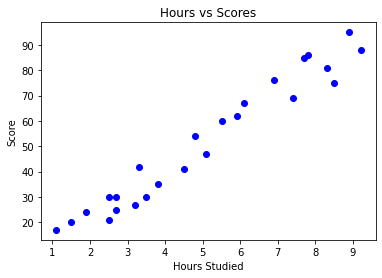

In [149]:
# plotting the distribution of the score
plt.scatter(df.Hours,df.Scores,color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

From the above scatter plot we can see that number of hours study and score are positively linearly related ,
so we can apply **Simple Linear Regression Model** for the given dataset.

### Spliting the data into training and test sets.

In [150]:
# Divide the data into input and output.
X = df[['Hours']]
y = df[['Scores']]

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2) 

In [152]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

### Fitting the Model

In [153]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [154]:
model.coef_

array([[9.94061514]])

In [155]:
model.intercept_

array([1.50791048])

### Plotting the regression line

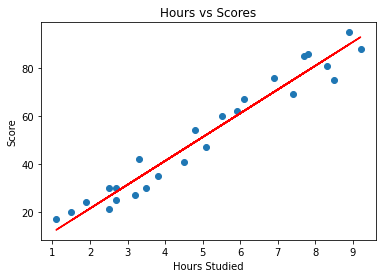

In [156]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,label="Score")
plt.plot(X, line,color="red",label="Regression Line")
plt.title('Hours vs Scores')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


### Prediction using fitted model

In [157]:
y_pred = model.predict(X_test)
y_pred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [158]:
# Creating Dataframe form actual and predicted values.
data = pd.DataFrame(np.c_[y_test,y_pred],columns = ["Actual Score","Predicted Score"]) 
data

,Actual Score,Predicted Score
0,17.0,12.442587
1,21.0,26.359448
2,24.0,20.395079
3,88.0,92.961570
4,76.0,70.098155


**Predicting the score when student study 9.25 hrs/day**

In [159]:
hours = 9.25
pred = model.predict([[hours]])
print("Number of study hours : ", hours)
print("Predicted Score:", pred)

Number of study hours :  9.25
Predicted Score: [[93.45860056]]


## Model Evaluation

In [160]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
     

Mean Absolute Error: 4.877039354964484


## Checking Model Accuracy

In [161]:
print("Model Score :",model.score(X_test,y_test))

Model Score : 0.9735538080811826


We can see that our model gives 97.35% accurate result.                                                                          
**Conclusion:** If the student study 9.25 hrs/day then they get 93.45% score.
###           **THANK YOU**